## import package

In [38]:
import nextbike

## Read in raw data

In [2]:
dfRaw = nextbike.io.read_file()
dfWeather = nextbike.io.getWeatherData()
dfRawData = nextbike.io.preprocessData(dfRaw)  


In [3]:


#Station data
stationData = nextbike.io.preprocessStationData(dfRaw)
dfBikesPerStationIndex = nextbike.io.createBikeNumberPerStationIndex(stationData)
dfBikesPerStationIndex.head()

,5140,5141,5142,5143,5144,5145,5146,5147,5150,5151,...,5168,5169,5171,5172,5173,5174,5175,5176,5177,5178
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfTripsRaw = nextbike.io.createTrips(dfRawData)
dfTrips = nextbike.io.drop_outliers(dfTripsRaw)
dfTrips = nextbike.postalCodes.assignPostalCode(dfTrips)
dfTrips = nextbike.postalCodes.filterForPostalCodes(dfTrips)
dfTrips.head()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec,sPostalCode,ePostalCode
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660,35039,35037
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480,35037,35037
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900,35037,35039
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180,35039,35039
5,11270,2019-01-20 00:25:00,2019-01-20 00:37:00,00:12:00,8.775948,50.813203,8.775948,50.813203,True,15,5156,5156,720,35037,35037


In [5]:
dfStations = nextbike.io.createStations(dfRawData)
dfStations.head()

,pName,pLat,pLong
pNumber,,,
0,no fixed station,NaN,NaN
5140,Anatomie,50.816058,8.772242
5141,Ketzerbach/Zwischenhausen,50.813950,8.766160
5142,Friedrichplatz,50.803270,8.764060
5143,Interkulturelle Gaerten/ Am Richtsberg,50.794700,8.772230


In [6]:
dfTripsPerDay = nextbike.io.createTripsPerDay(dfTrips,dfWeather)
dfTripsPerDay.head()

,date,tripsPerDay,temperatureMAX,temperatureAVG,temperatureMIN,precipitationAVG,day,month,dayOfWeek
0,2019-01-20,843,1.5,-7.373611,-11.6,0.000000,20,1,6
1,2019-01-21,1182,-0.7,-8.700694,-12.9,0.000000,21,1,0
2,2019-01-22,1038,-3.2,-5.825694,-12.3,0.000000,22,1,1
3,2019-01-23,1221,-1.7,-3.445139,-5.9,0.000000,23,1,2
4,2019-01-24,1458,-2.5,-4.198611,-5.2,0.001111,24,1,3


## save data to csv files
### (belongs to task 1c)

In [7]:
nextbike.io.save_Weather(dfWeather)
nextbike.io.save_tripData(dfTrips)
nextbike.io.save_StationData(dfStations)
nextbike.io.save_dfBikesPerStationIndexs(dfBikesPerStationIndex)
nextbike.io.save_tripsPerDay(dfTripsPerDay)

# 2. Visualization

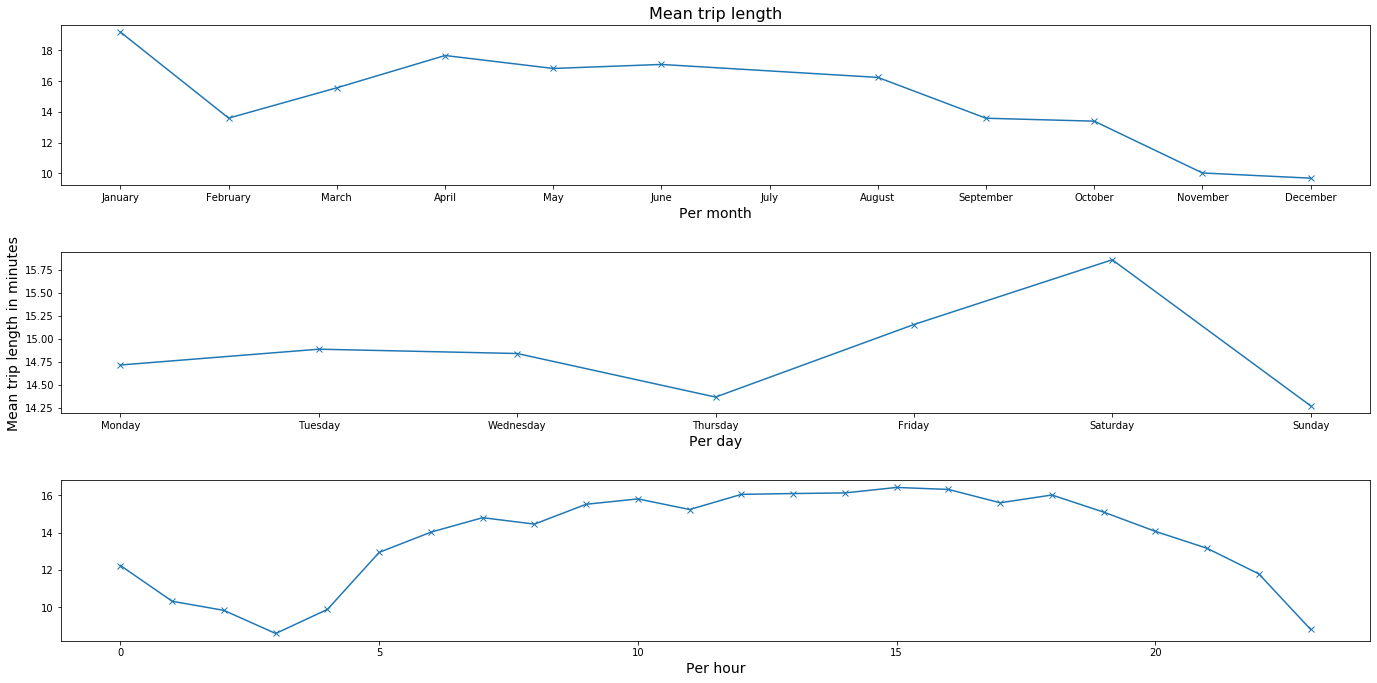

In [8]:
nextbike.visualization.visualizeMeanTripLength(dfTrips).show()

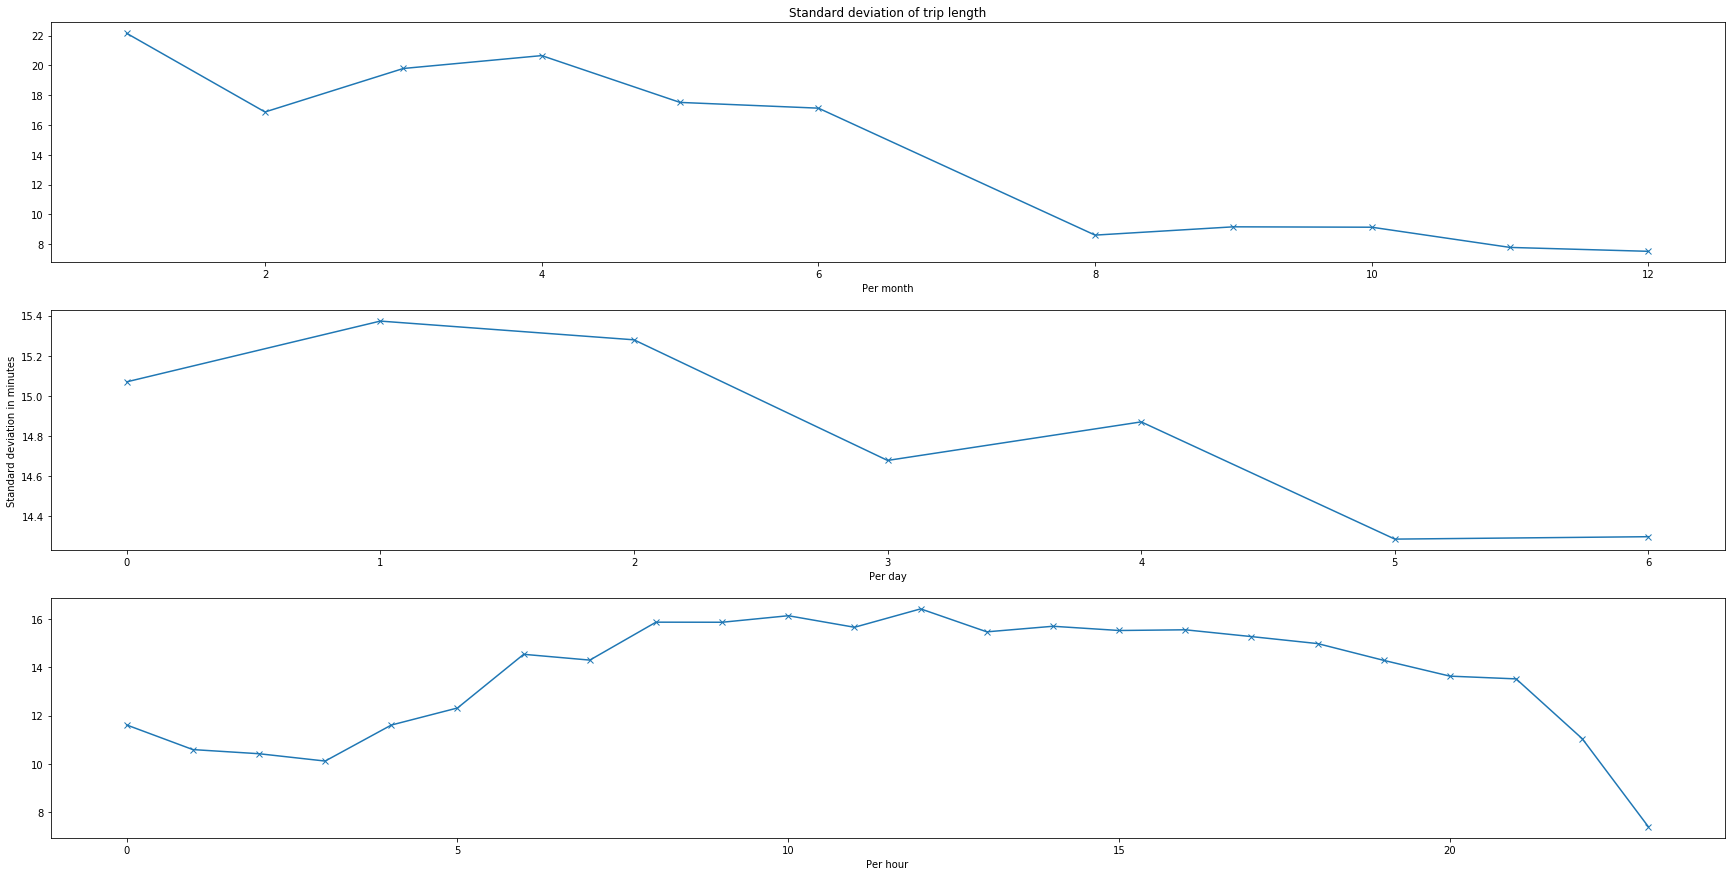

In [18]:
 nextbike.visualization.visualizeStdTripLength(dfTrips).show()

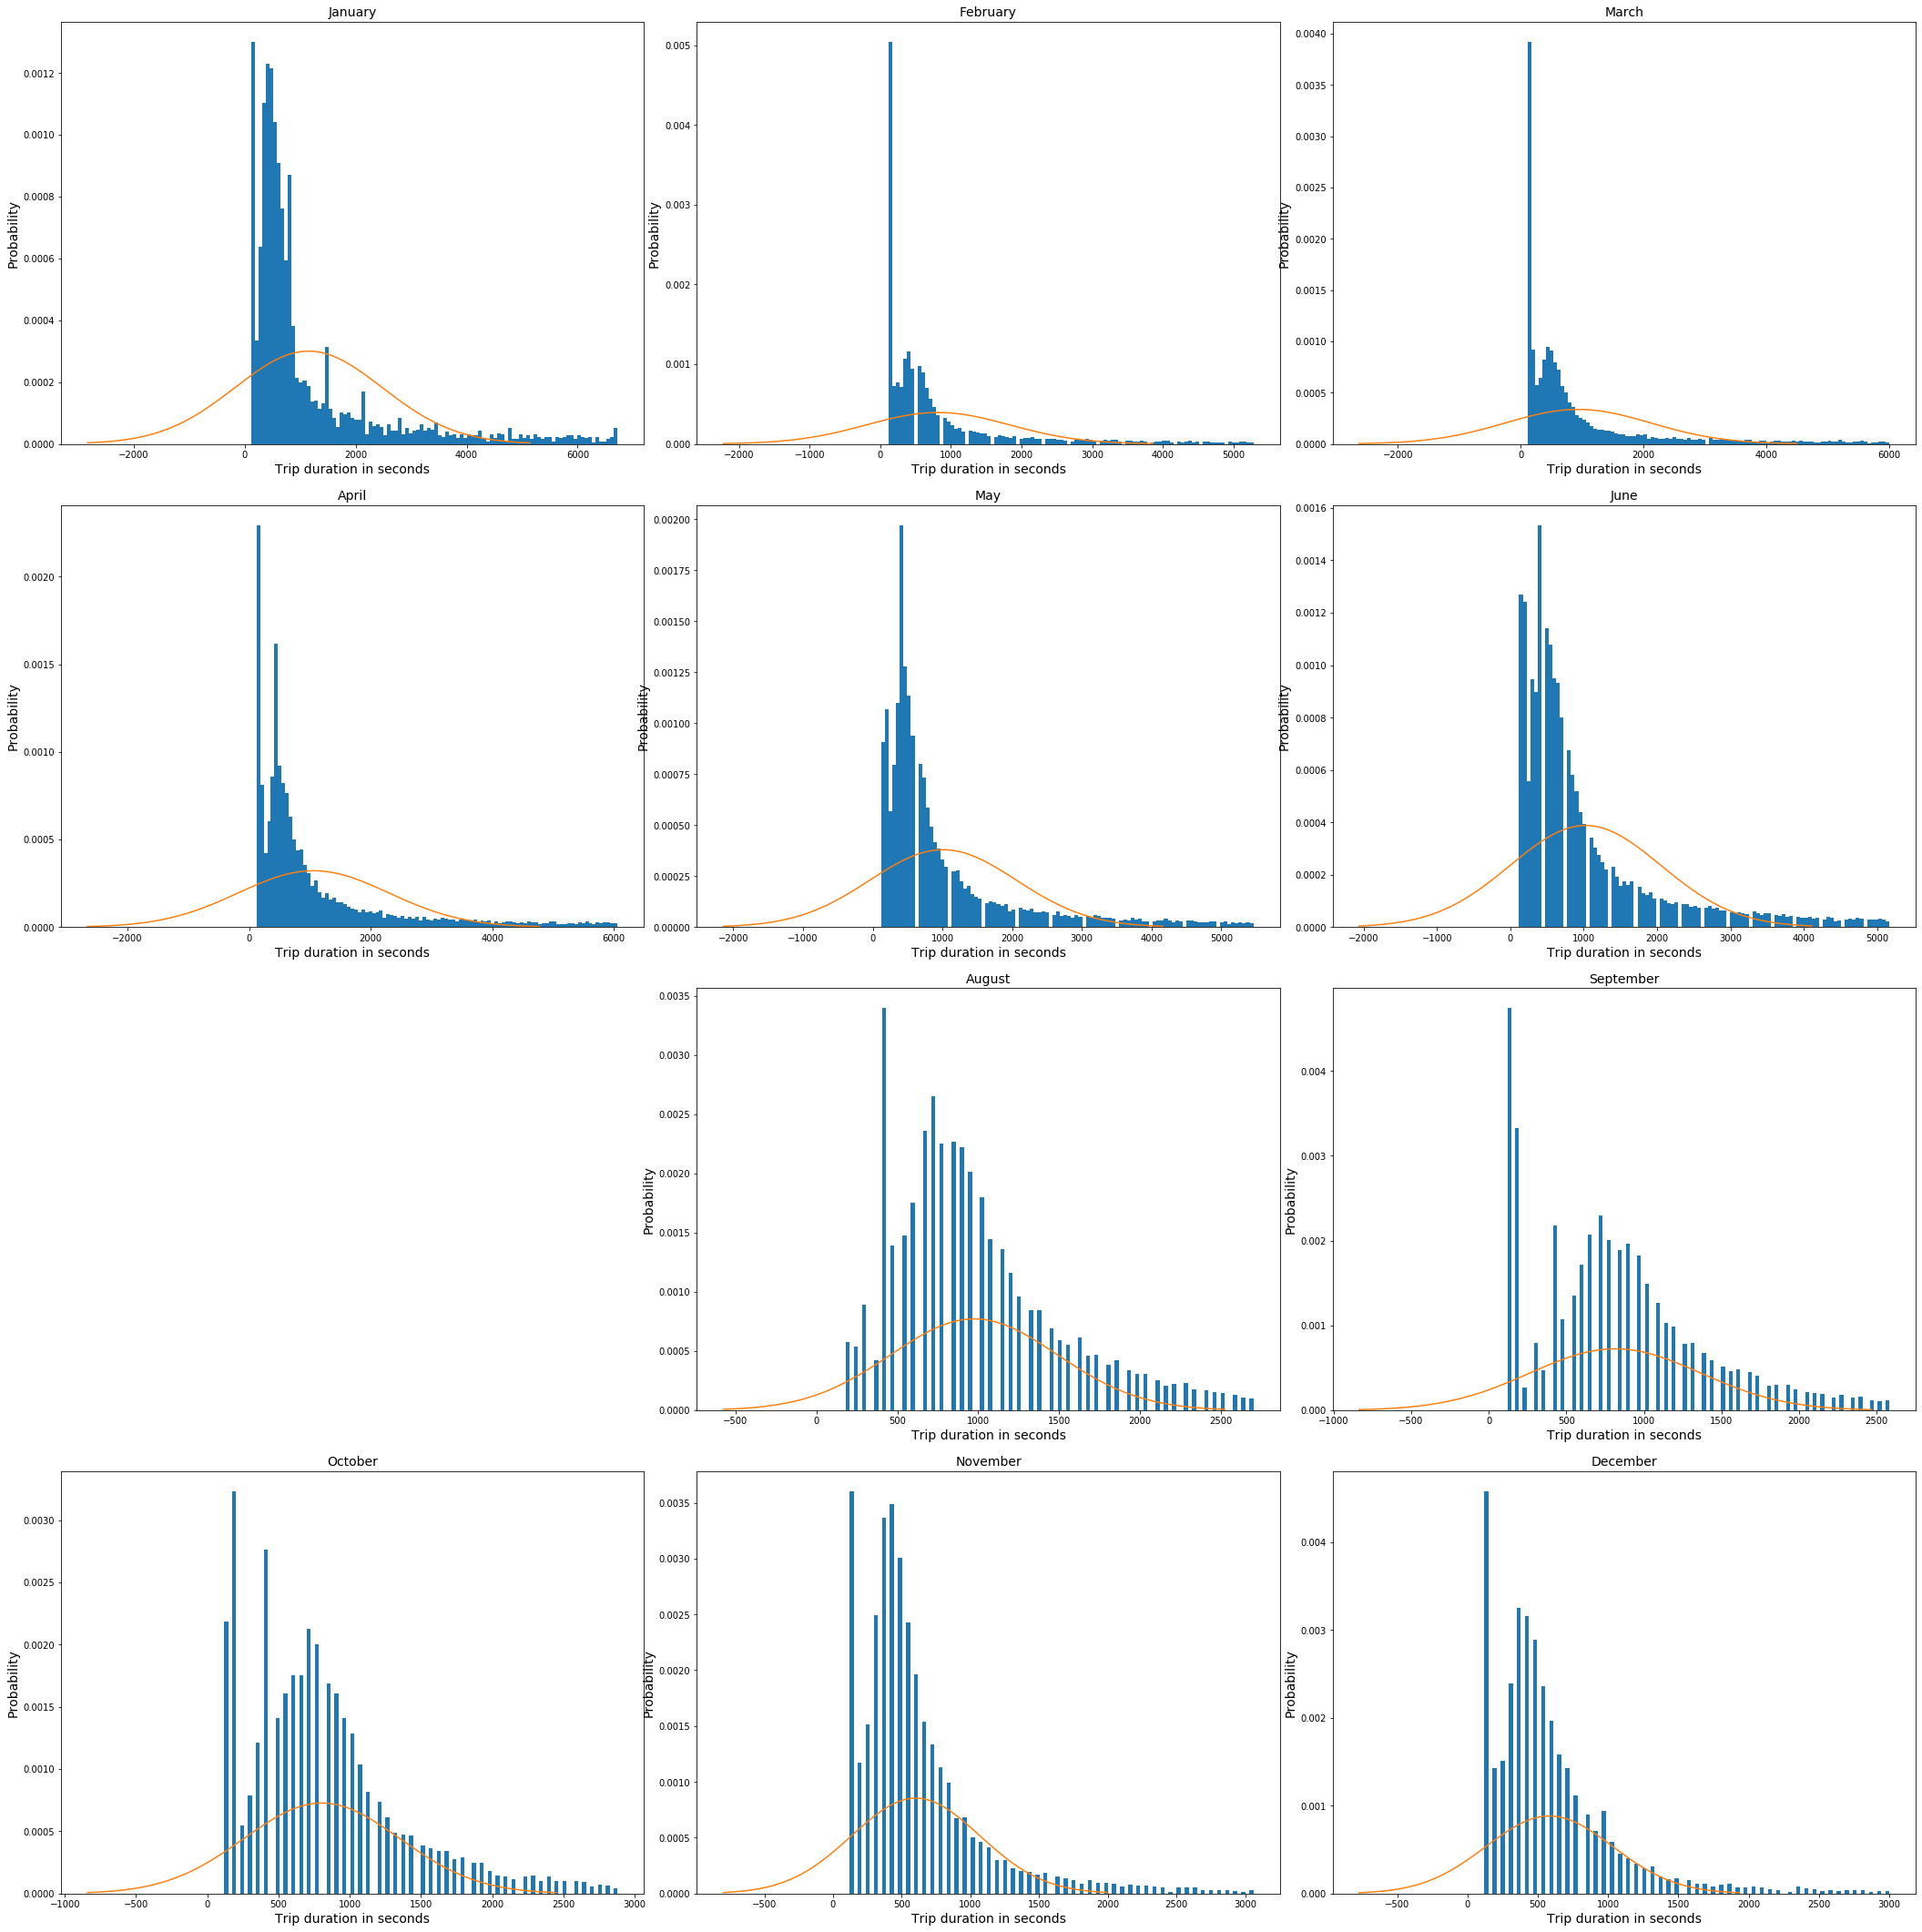

In [9]:
nextbike.visualization.visualizeDistributionOfTripsPerMonth(dfTrips).show()

In [12]:
m = nextbike.visualization.visualizeNumberOfBikesPerStationMap('2019-08-20 19:00:00', dfStations, dfBikesPerStationIndex)
m

KeyError: "None of [Index(['5140'], dtype='object')] are in the [columns]"

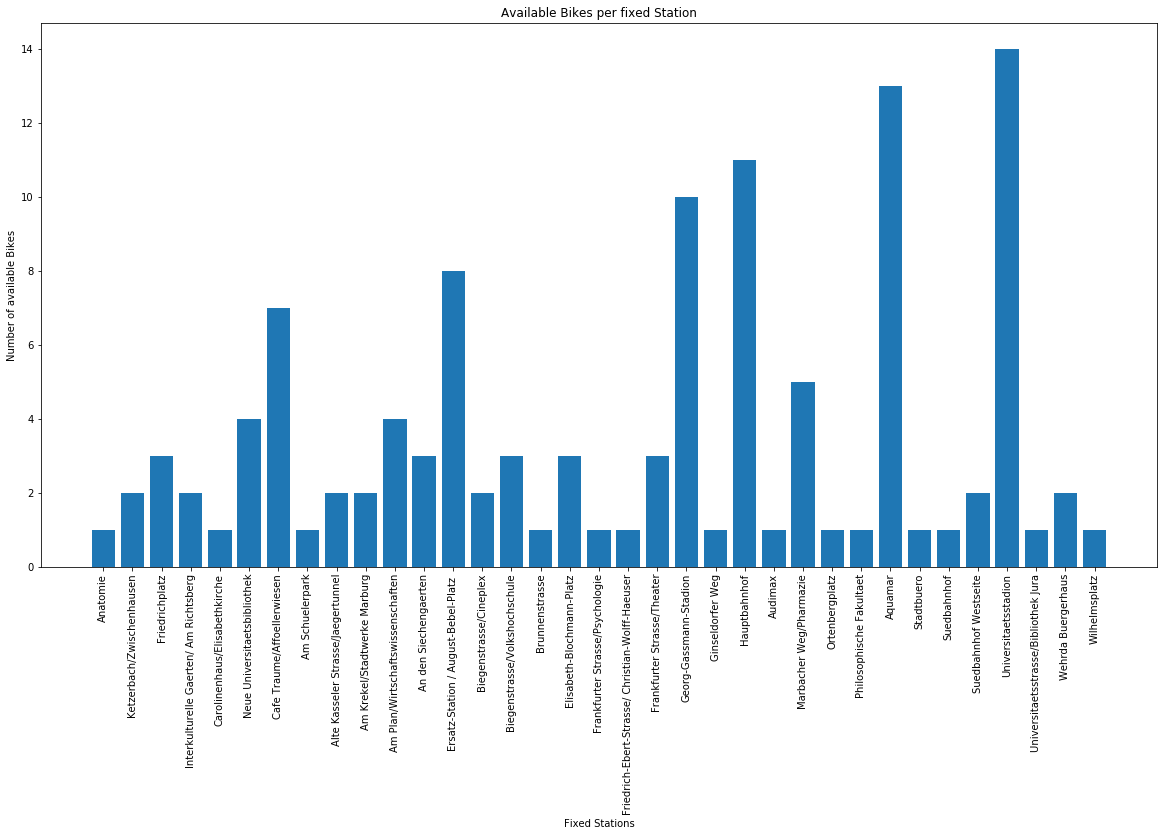

In [13]:
nextbike.visualization.visualizeNumberOfBikesPerStationBarplot('2019-08-20 19:00:00', dfStations, dfBikesPerStationIndex)

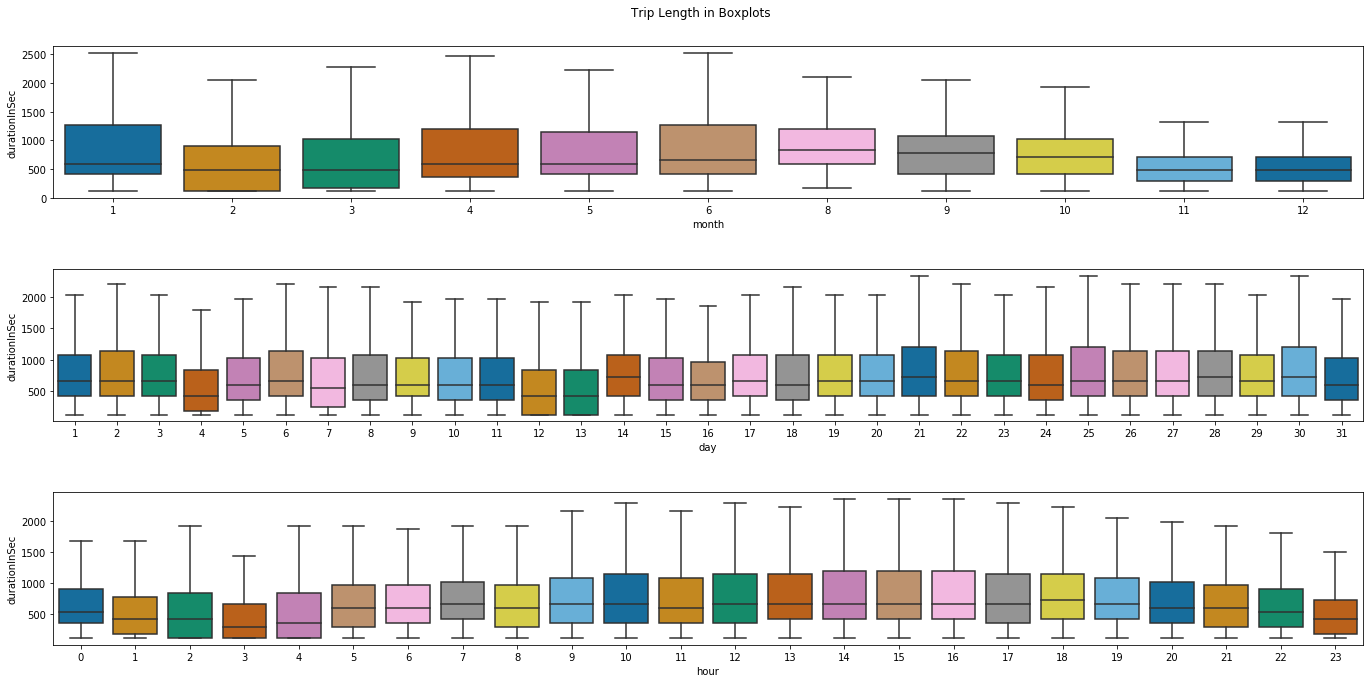

<module 'seaborn' from 'D:\\Conda\\new\\lib\\site-packages\\seaborn\\__init__.py'>

In [14]:
nextbike.visualization.visualizeTripLengthBoxplots(dfTrips)

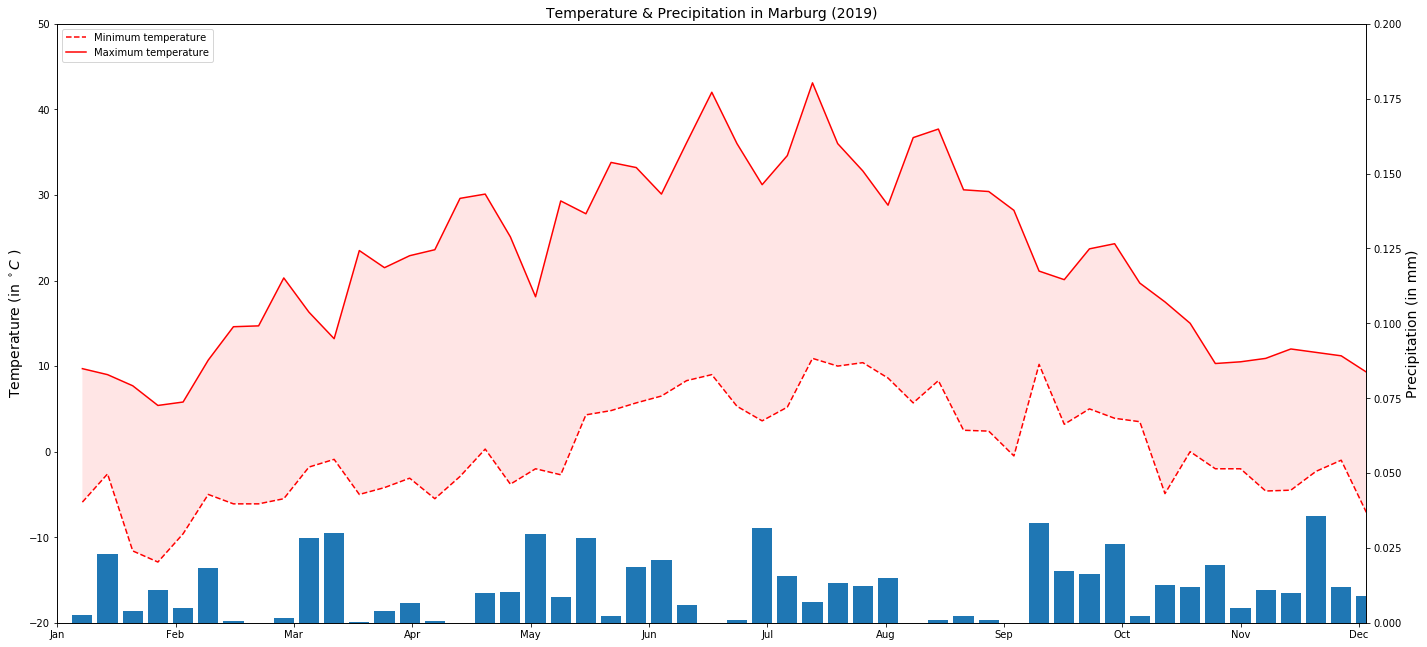

In [15]:
nextbike.visualization.visualizeWeatherData(dfWeather).show()

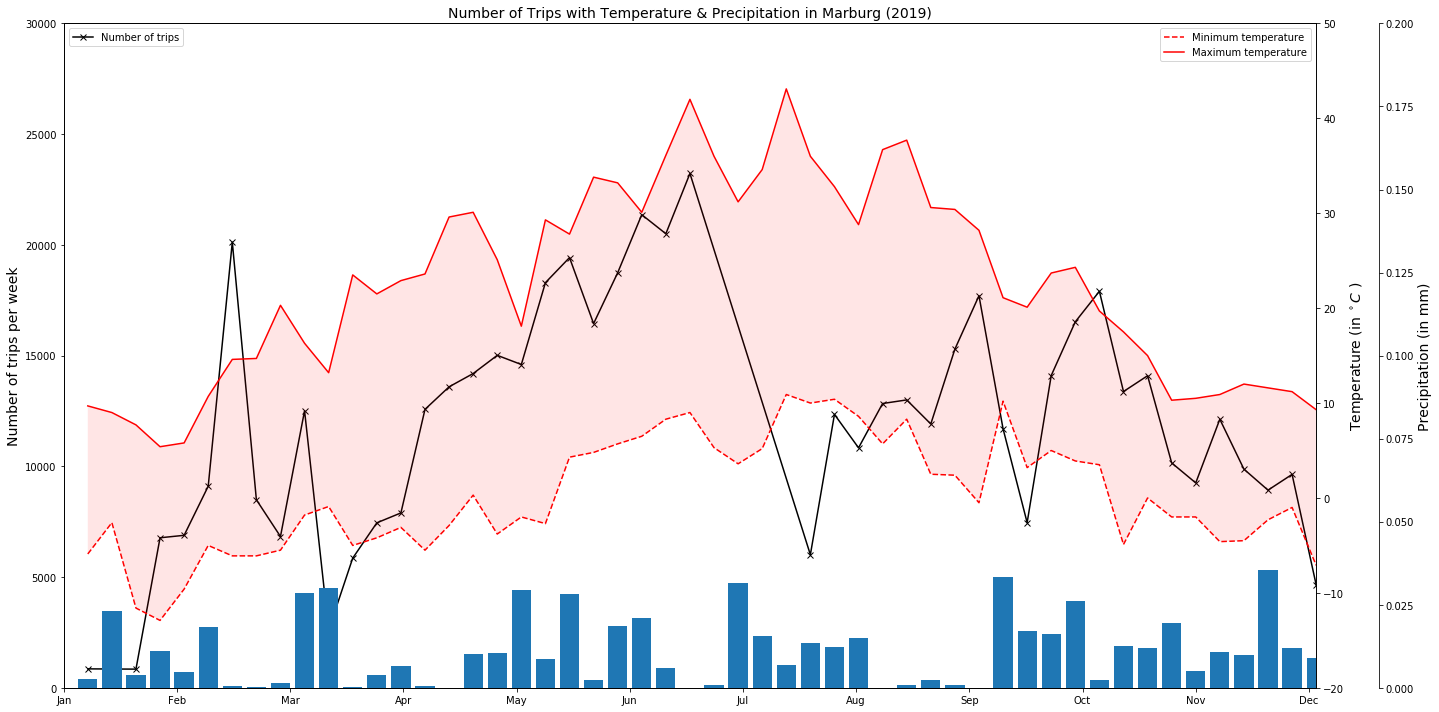

In [28]:
nextbike.visualization.visualizeNumberOfTripsWithTemperatureAndPrecipitation(dfWeather,dfTrips)

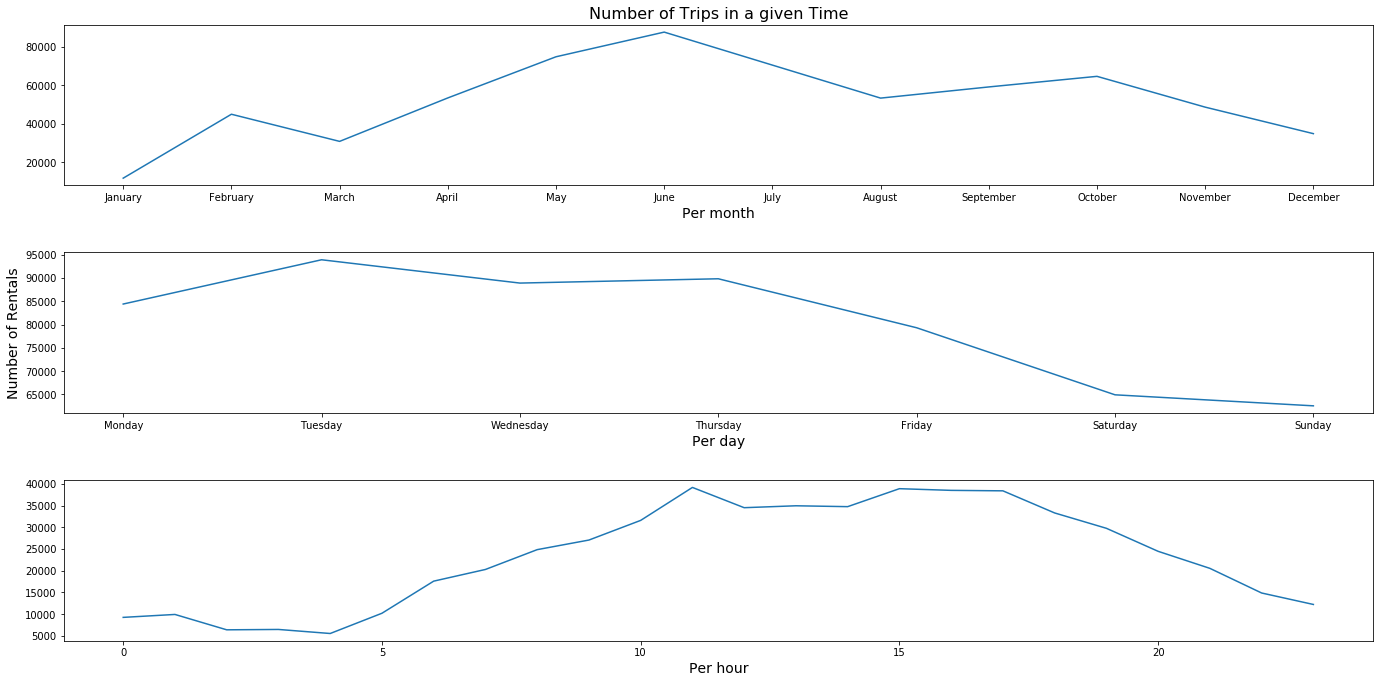

In [16]:
nextbike.visualization.visualizeNumberOfTrips(dfTrips).show()

In [17]:
nextbike.prediction.retrainModel_DurationOfTrips(dfTrips,dfWeather,False)

Test  :   MAE:  179.70910738263976 MSE:  143064.66111014565 R^2:  0.8216195549168994
Train :   MAE:  80.06080710384941 MSE:  37633.34503611135 R^2:  0.9528340603700574
Compare to prediction by average (last 6 months):   MAE:  639.6761519674906  MSE:  808185.3480071748
Compare to prediction by average (last month):   MAE:  654.6623901742012  MSE:  815970.321192959


In [35]:
nextbike.prediction.predictTripDirection(dfTrips,dfWeather)

This can take a few minutes
Prediction is saved to csv --> output/DirectionOfTripsPrediction.csv
              precision    recall  f1-score   support

           0       0.56      0.58      0.57     12259
           1       0.45      0.44      0.44      9887

    accuracy                           0.51     22146
   macro avg       0.51      0.51      0.51     22146
weighted avg       0.51      0.51      0.51     22146



array([[0.6],
       [0.6],
       [0.4],
       ...,
       [0.6],
       [0.6],
       [0.4]])

In [18]:
nextbike.prediction.trainKNNRegression(dfTrips,dfWeather)

This can take a few minutes
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     96333
           1       0.70      0.68      0.69     72831

    accuracy                           0.74    169164
   macro avg       0.73      0.73      0.73    169164
weighted avg       0.73      0.74      0.73    169164



Fitting 3 folds for each of 150 candidates, totalling 450 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   52.8s finished
Test  :   MAE:  301.72539427142533 MSE:  149266.7607007248 R^2:  0.7484033926649505
Train :   MAE:  139.90444300166303 MSE:  35408.64408246007 R^2:  0.9373038804317846


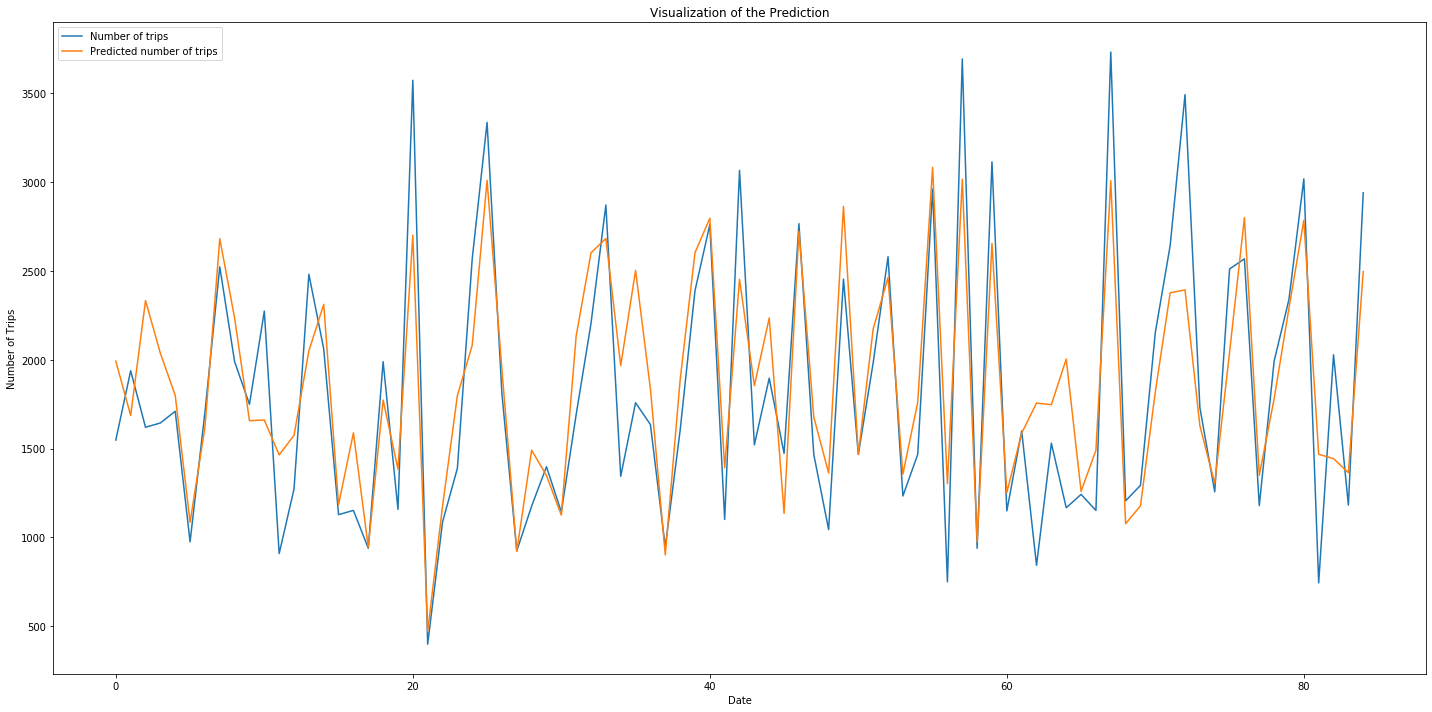

In [19]:
nextbike.prediction.retrainModel_NumberOfTrips(dfTripsPerDay,True)

Test  :   MAE:  296.5323176470586 MSE:  150602.09027579986 R^2:  0.7461526277311777
Train :   MAE:  110.1063807106597 MSE:  20508.91836756844 R^2:  0.9636859972611946


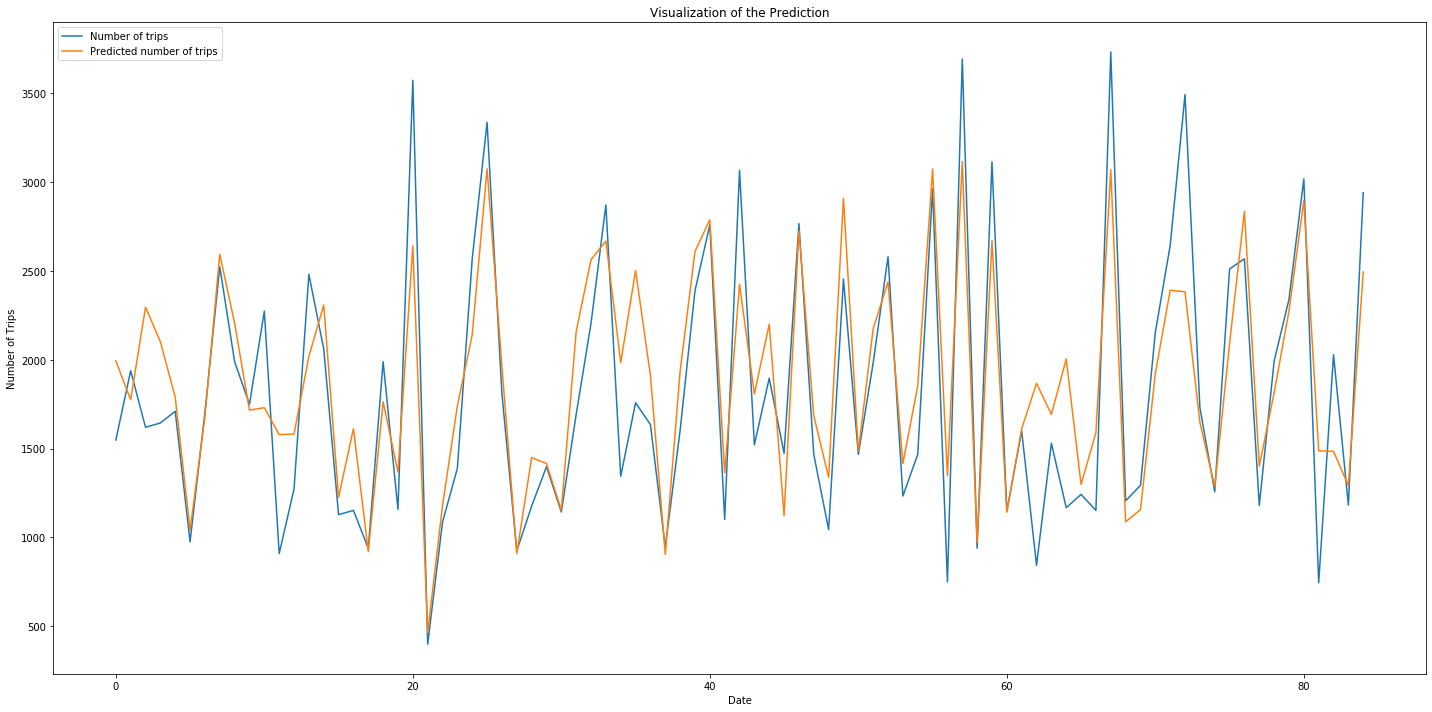

In [20]:
nextbike.prediction.retrainModel_NumberOfTrips(dfTripsPerDay,False)

Prediction is saved to csv --> output/NumberOfTripPrediction.csv
Test  :   MAE:  301.95203225806455 MSE:  130948.68641074188 R^2:  -2.8563883458688677
Compare to prediction by average (last 6 months):   MAE:  957.6129032258065  MSE:  950978.7741935484
Compare to prediction by average (last month):   MAE:  2206.6129032258063  MSE:  4903096.806451613


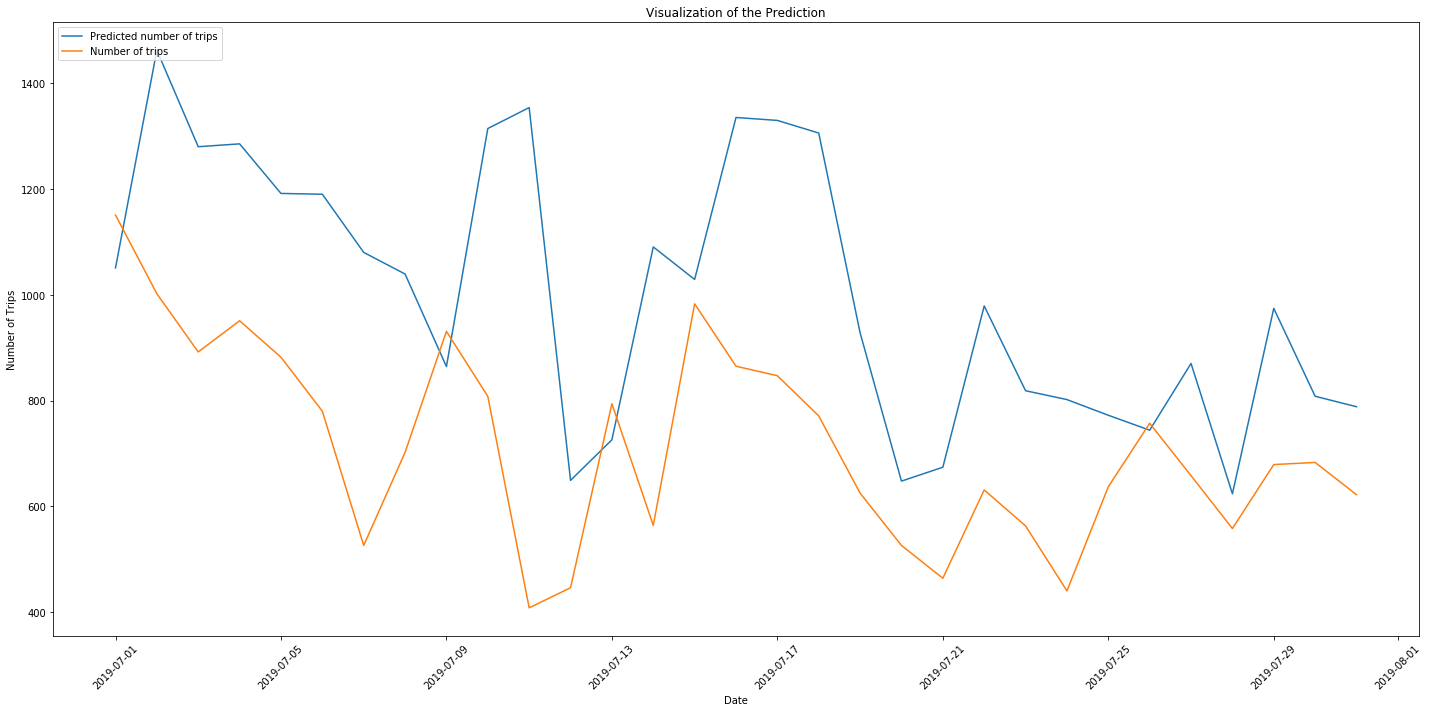

,temperatureAVG,precipitationAVG,dayOfWeek,tripsLastDay,tripsOneWeekAgo,isTerm,tripsPerDay
0,21.793056,0.006042,0,714.387097,714.387097,1,1050.993
1,18.093056,0.000000,1,1151.000000,714.387097,1,1462.584
2,17.291667,0.000000,2,1002.000000,714.387097,1,1280.190
3,18.683333,0.000000,3,892.000000,714.387097,1,1285.587
4,21.070833,0.000000,4,951.000000,714.387097,1,1191.810
5,22.963194,0.000000,5,882.000000,714.387097,1,1190.301
6,18.004861,0.000000,6,780.000000,714.387097,1,1080.267
7,14.222917,0.000000,0,526.000000,1151.000000,1,1039.401
8,13.859722,0.000000,1,702.000000,1002.000000,1,864.381
9,18.345139,0.000625,2,931.000000,892.000000,1,1314.585


In [36]:
model, sscaler, sscalerY = nextbike.prediction.loadModel_NumberOfTrips()
nextbike.prediction.predict_NumberOfTrips(dfTripsPerDay, model, sscaler,sscalerY)

In [37]:
model, sscaler, sscalerY = nextbike.prediction.loadModel_DurationOfTrips()
nextbike.prediction.predict_DurationOfTrips(dfTrips, dfWeather, model, sscaler,sscalerY)

ValueError: operands could not be broadcast together with shapes (22146,41) (44,) (22146,41) 

In [29]:
rawData = nextbike.io.read_file("marburg_test.csv")
dfRawData = nextbike.io.preprocessData(rawData)  
dfTripsRaw = nextbike.io.createTrips(dfRawData)
dfTrips = nextbike.io.drop_outliers(dfTripsRaw)
dfTrips = nextbike.postalCodes.assignPostalCode(dfTrips)
dfTrips = nextbike.postalCodes.filterForPostalCodes(dfTrips)

stationData = nextbike.io.preprocessStationData(rawData)
sfBikesPerStationIndex = nextbike.io.createBikeNumberPerStationIndex(stationData)
dfStations = nextbike.io.createStations(dfRawData)
dfTripsPerDay = nextbike.io.createTripsPerDay(dfTrips,dfWeather)